In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv("stock.csv")

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,"Jun 13, 2022",107.45,109.22,106.59,106.88,"18,37,810"
1,"Jun 14, 2022",106.89,108.46,106.35,107.19,"12,74,047"
2,"Jun 15, 2022",108.90,112.06,108.12,110.39,"16,59,601"
3,"Jun 16, 2022",108.15,109.29,105.79,106.64,"17,65,662"
4,"Jun 17, 2022",106.54,109.25,105.63,107.87,"21,75,833"
...,...,...,...,...,...,...
245,"Jun 5, 2023",124.61,127.99,124.38,126.63,"2,26,72,516"
246,"Jun 6, 2023",126.60,128.88,125.97,127.91,"1,94,50,128"
247,"Jun 7, 2023",127.58,129.55,122.63,122.94,"3,41,79,348"
248,"Jun 8, 2023",122.59,123.73,122.01,122.67,"2,48,14,996"


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

In [5]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [6]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(100))
model.add(Dense(1))

In [7]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(train_data[:-1], train_data[1:], epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 6ms/step - loss: 0.2049
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1602
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1159
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0691
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0325
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0193
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0207
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0147
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 13/100
7/7 [==============================] - 0s 5ms/st

In [8]:
predictions = model.predict(test_data[:-1])
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 0s/step


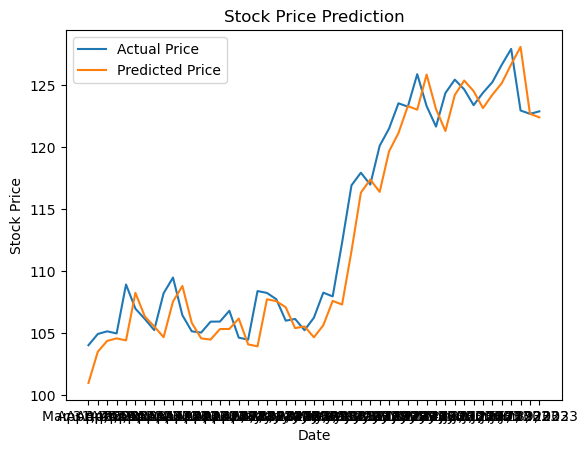

In [9]:
plt.plot(df["Date"].iloc[train_size+1:], df["Close"].iloc[train_size+1:], label="Actual Price")
plt.plot(df["Date"].iloc[train_size+1:], predictions, label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()